In [1]:
#Fjerner Magnerne på notebooken
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</stule>"))

In [2]:
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [4]:
#%matplotlib widget

In [5]:
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"
path_figs = os.getcwd() +"\\..\\Figures\\" 

In [6]:
# Get daily cases by regions
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir
df_cases = pd.read_csv(latestdir+'/Kommunalt_DB/07_bekraeftede_tilfaelde_pr_dag_pr_kommune.csv',
                       encoding='latin1',delimiter = ';')

latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

In [7]:
# Get daily fully vaccinated by reagions
latestsubdir = list(os.walk(path_vacc))[0][1][-1]
latestdir = path_vacc + latestsubdir
df_vacc = pd.read_csv(latestdir+'/Vaccine_DB/FaerdigVacc_kommune_dag.csv',
                      encoding='latin1',delimiter = ';')

latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df_cases = pd.read_csv(latestdir+'/Kommunalt_DB/07_bekraeftede_tilfaelde_pr_dag_pr_kommune.csv',
                       encoding='latin1',delimiter = ';')
df_cases['Dato'] =  pd.to_datetime(df_cases.Dato,format='%Y-%m-%d')
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

#Fix Columnaming problem and format dates
df_vacc = df_vacc.rename(columns={'Faerdigvacc. dato': 'Faerdigvacc_dato'})
df_vacc['Faerdigvacc_dato'] =  pd.to_datetime(df_vacc.Faerdigvacc_dato,format='%Y-%m-%d')



In [8]:

df_kommune_kort = pd.read_csv(latestdir+'/Kommunalt_DB/10_Kommune_kort.csv',
                            encoding='latin1', delimiter = ';')
kommunenavn = df_kommune_kort["Kommunenavn"].dropna()
#kommunenavn = ["København","Århus","Odense"] 

def antal_borgere(kommunenavn):
    return df_kommunekort["Antal borgere"][kommunenavn]

In [9]:
kom_dic = {}

for i in kommunenavn:

    kommune_vac_df = df_vacc.loc[df_vacc["kommunenavn"] == i]
    #firstDate = np.datetime64(kommune_df.loc[kommune_df.index[start],'Dato'])-np.timedelta64(1,'D')
    lastDate = np.datetime64(kommune_vac_df.loc[kommune_vac_df.index[-1],'Faerdigvacc_dato'])
    
    # Find number of citizens in region
    df_kommunekort = pd.read_csv(latestdir+'/Kommunalt_DB/10_Kommune_kort.csv',encoding='latin1',
                                 delimiter = ';')
    df_kommunekort = df_kommunekort.set_index("Kommunenavn")

    # Make row of accumulated vaccinations percentage of pop
    kommune_vac_df["Kumuleret sum vac"] = kommune_vac_df['Antal faerdigvacc.'].cumsum() 
    
    kommune_vac_df['Kumuleret procent faerdigvacc.'] = (kommune_vac_df["Kumuleret sum vac"]/antal_borgere(i))*100
    
    # Make row of accumulated infections percentage of pop
    kommune_cases_df = df_cases.loc[df_cases["Kommunenavn"] == i]
    kommune_cases_df["Kumuleret sum tilfælde"] = kommune_cases_df['Bekræftede tilfælde i alt'].cumsum() 
    
    kommune_cases_df['Kumuleret procent smittede'] = (kommune_cases_df["Kumuleret sum tilfælde"]/antal_borgere(i))*100
    
    kommune_merge_df = pd.merge(left=kommune_vac_df, left_on='Faerdigvacc_dato',
         right=kommune_cases_df, right_on='Dato')
    kom_dic[i] = kommune_merge_df
#     plt.plot(kommune_merge_df["Faerdigvacc_dato"],
#              kommune_merge_df["Kumuleret procent faerdigvacc."],label=i,linewidth=0.5)
#     plt.plot(kommune_merge_df["Faerdigvacc_dato"],
#              kommune_merge_df["Kumuleret procent smittede"],label=i,linewidth=0.5)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_8188/1908026030.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kommune_vac_df["Kumuleret sum vac"] = kommune_vac_df['Antal faerdigvacc.'].cumsum()
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_8188/1908026030.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kommune_vac_df['Kumuleret procent faerdigvacc.'] = (kommune_vac_df["Kumuleret sum vac"]/antal_borgere(i))*100
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_8188/1908026030.py:21: SettingWithCopyW

In [10]:

#kommunenavn = ["København","Roskilde","Brøndby","Aalborg"]
#Add low and high estimate of susceptible in each kommune
for i in kommunenavn:
    #kom_dic[i]["Uafhængigt modtagelige"]=(1-kom_dic[i]["Kumuleret procent faerdigvacc."]/100-kom_dic[i]["Kumuleret procent smittede"]/100)*100
    #kom_dic[i]["Afhængigt modtagelige"]=((1-kom_dic[i]["Kumuleret procent faerdigvacc."]/100)*(1-kom_dic[i]["Kumuleret procent smittede"]/100))*100

    #kom_dic[i]["Uafhængigt immunutet"]=(kom_dic[i]["Kumuleret procent faerdigvacc."]/100+kom_dic[i]["Kumuleret procent smittede"]/100)*100
    #kom_dic[i]["Afhængigt immunutet"]=((kom_dic[i]["Kumuleret procent faerdigvacc."]/100)*(kom_dic[i]["Kumuleret procent smittede"]/100))*100
    kom_dic[i]["P(Smittet og Vaccineret)"]=(kom_dic[i]["Kumuleret procent faerdigvacc."]/100*kom_dic[i]["Kumuleret procent smittede"]/100)*100
    kom_dic[i]["P(Smittede og ikke Vacinnerede)"]=((1-kom_dic[i]["Kumuleret procent faerdigvacc."]/100)*kom_dic[i]["Kumuleret procent smittede"]/100)*100
    kom_dic[i]["P(Vaccinerede og ikke Smittede)"]=(kom_dic[i]["Kumuleret procent faerdigvacc."]/100*(1-kom_dic[i]["Kumuleret procent smittede"]/100))*100
    kom_dic[i]["P(ikke Smittet og ikke Vaccineret)"]=((1-kom_dic[i]["Kumuleret procent faerdigvacc."]/100)*(1-kom_dic[i]["Kumuleret procent smittede"]/100))*100

    # kom_dic["Lejre"]
latest_V = []
latest_I = []

latest_SV = np.array([]) #Seneste P(Smittet og Vaccineret)
latest_SIV = np.array([]) # Seneste P(Smittet og ikke Vaccineret)
latest_ISV = np.array([]) # Seneste P(Vaccineret og ikke Smittet)
latest_ISIV = np.array([]) # Seneste P(ikke Smittet og ikke Vaccineret)


for i in kommunenavn:
    latest_V.append(kom_dic[i]["Kumuleret procent faerdigvacc."].iloc[-1])
    latest_I.append(kom_dic[i]['Kumuleret procent smittede'].iloc[-1])

    #latest_SV.append(kom_dic[i]["P(Smittet og Vaccineret)"].iloc[-1])
    latest_SV = np.append(latest_SV,kom_dic[i]["P(Smittet og Vaccineret)"].iloc[-1])
    latest_SIV = np.append(latest_SIV,kom_dic[i]["P(Smittede og ikke Vacinnerede)"].iloc[-1])
    latest_ISV = np.append(latest_ISV,kom_dic[i]["P(Vaccinerede og ikke Smittede)"].iloc[-1])
    latest_ISIV = np.append(latest_ISIV,kom_dic[i]["P(ikke Smittet og ikke Vaccineret)"].iloc[-1])
    

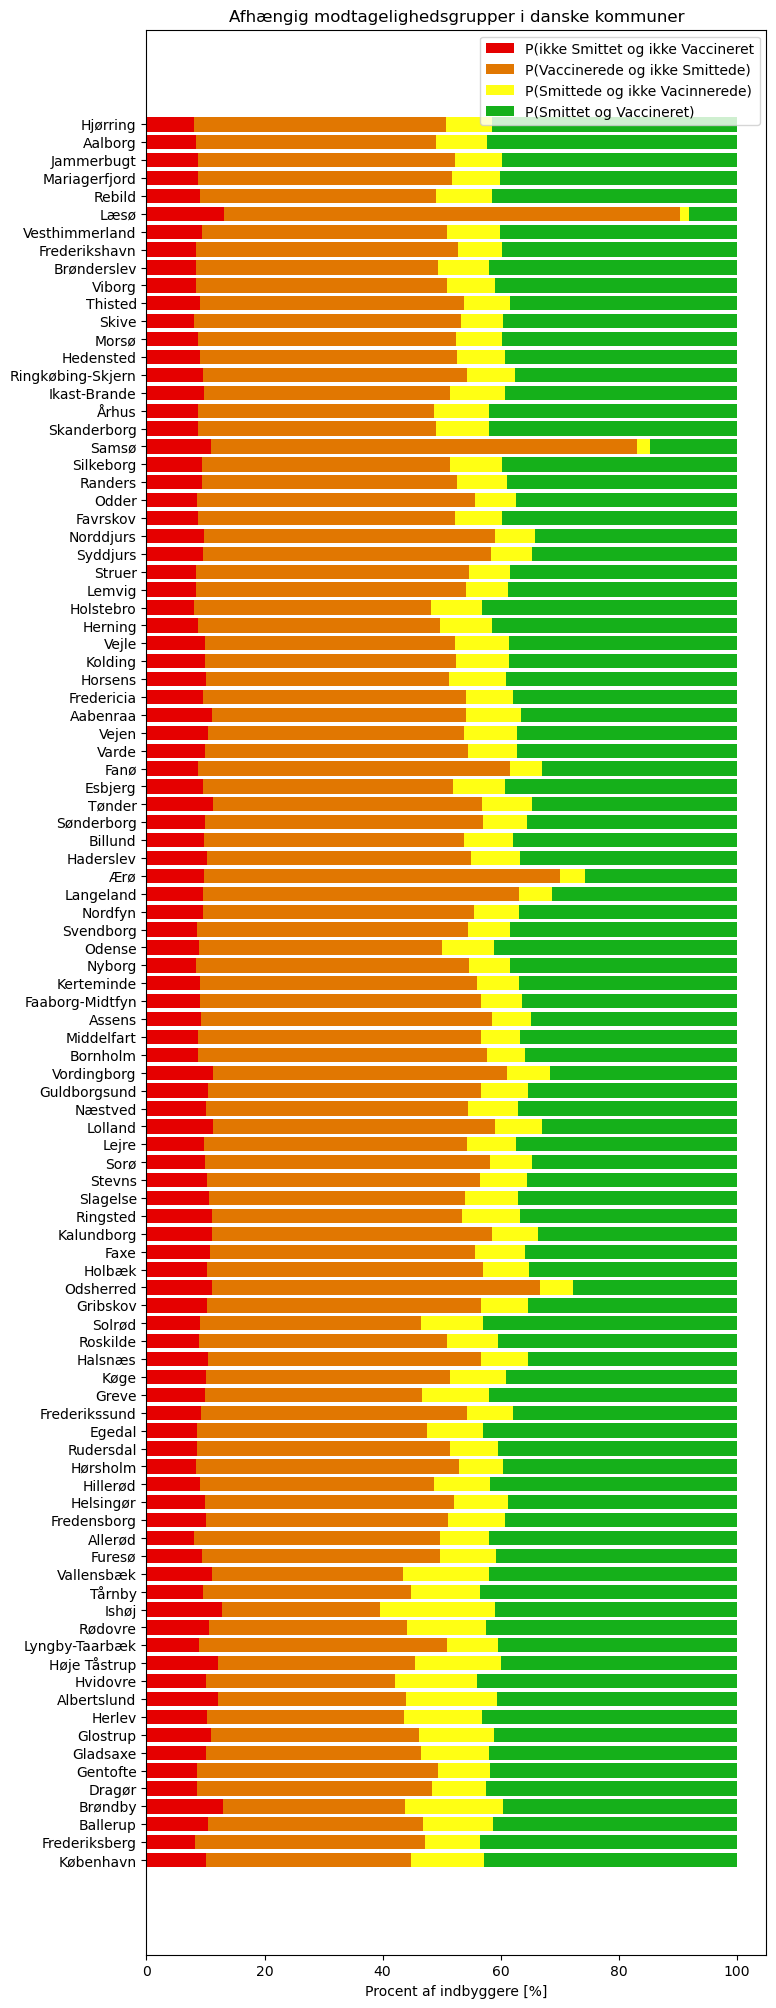

<Figure size 640x480 with 0 Axes>

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 25))

#4 Grupper P(V)*P(S)= P(Smittet og Vaccineret), P(1-V)*P(S) = P(Smittede og ikke Vacinnerede),
# P(V)*P(1-S)=P(Vaccinerede og ikke Smittede)
# P(1-V)*P(1-S)=P(ikke Smittede og ikke Vaccinerede = Sårbare

ax.barh(kommunenavn,latest_ISIV, label="P(ikke Smittet og ikke Vaccineret", color="xkcd:red")
ax.barh(kommunenavn,latest_ISV, left=latest_ISIV, label="P(Vaccinerede og ikke Smittede)", color="xkcd:pumpkin")
ax.barh(kommunenavn,latest_SIV, left=latest_ISV+latest_ISIV, label="P(Smittede og ikke Vacinnerede)", color="xkcd:yellow") # left = latest_V,
ax.barh(kommunenavn,latest_SV, left=latest_SIV+latest_ISV+latest_ISIV, label="P(Smittet og Vaccineret)", color="xkcd:green")




ax.set_xlabel('Procent af indbyggere [%]')
ax.set_title('Afhængig modtagelighedsgrupper i danske kommuner')

# plt.axvline(x=100,ls="--",color="k",label="100% Immunitet")
# plt.legend(["100% Immunitet","Uafhængige: p(I)=p(V)+p(S)","Afhængige p(I)=p(V)*p(S)","Færdvaccinerede"])
plt.legend()
fig_path = os.getcwd() +"\\..\\Figures"
plt.show()
plt.savefig(fig_path+"\Afhængig modtagelighed i danske kommuner.png",bbox_inches ="tight",pad_inches = 1)

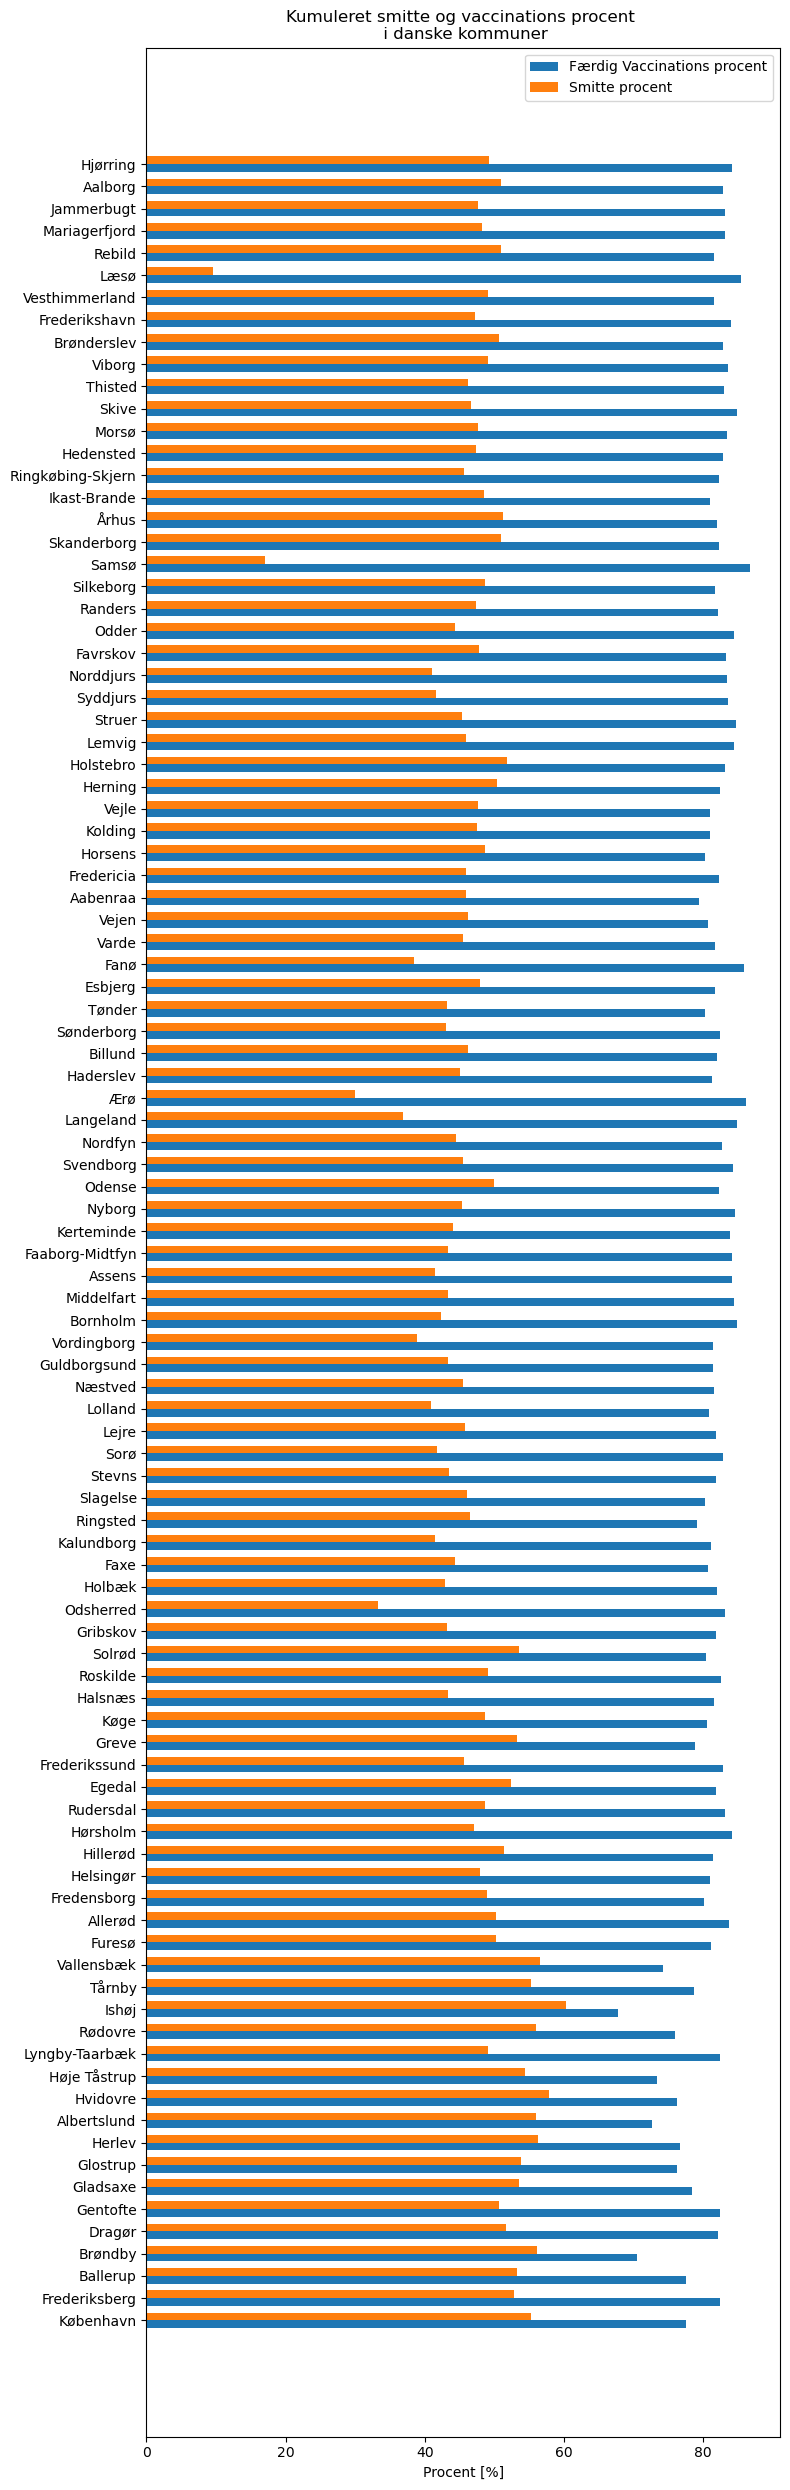

In [12]:
x = np.arange(len(kommunenavn))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 25))
rects1 = ax.barh(x - width/2, latest_V, width, label='Færdig Vaccinations procent')
rects2 = ax.barh(x + width/2, latest_I, width, label='Smitte procent')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Procent [%]')
ax.set_title('Kumuleret smitte og vaccinations procent \n i danske kommuner')
ax.set_yticks(np.arange(len(kommunenavn)))
ax.set_yticklabels(kommunenavn)
ax.legend()



fig.tight_layout()


fig_path = os.getcwd() +"\\..\\Figures"
plt.savefig(fig_path+"\Smitte og vaccinations procent i danske kommuner.png",bbox_inches ="tight",pad_inches = 1)
plt.show()

In [13]:
# fig_path = os.getcwd() +"\\..\\Figures\modtagelighed i kommuner"
# #kommunenavn = ["København"]
# for i in kommunenavn:
#     plt.figure(figsize=(12, 6), dpi=120)
#     plt.ylabel("[%] i kommune")
#     plt.title(f"{i} Modtagelighed")
#     plt.show()
#     plt.plot(kom_dic[i]["Faerdigvacc_dato"],kom_dic[i]["Afhængigt modtagelige"],linewidth=1,color="xkcd:blue")
#     plt.plot(kom_dic[i]["Faerdigvacc_dato"],kom_dic[i]["Uafhængigt modtagelige"],linewidth=1,color="xkcd:green")

#     plt.plot(kom_dic[i]["Faerdigvacc_dato"],kom_dic[i]["Kumuleret procent faerdigvacc."],linewidth=1,color="xkcd:teal",ls="-.")
#     plt.plot(kom_dic[i]["Faerdigvacc_dato"],kom_dic[i]['Kumuleret procent smittede'],linewidth=1,color="xkcd:violet",ls="-.")

#     plt.fill_between(kom_dic[i]["Faerdigvacc_dato"],kom_dic[i]["Afhængigt modtagelige"], kom_dic[i]["Uafhængigt modtagelige"], color='xkcd:grey', alpha=0.5,hatch='///')
#     plt.xticks(rotation = 45)
#     plt.plot([kom_dic[i]["Faerdigvacc_dato"].iloc[0],kom_dic[i]["Faerdigvacc_dato"].iloc[-1]],[0,0],"--k",linewidth=0.8)

#     plt.legend(["Afhængige: $p_{a}(I)=p(V)*p(S)$","Uafhængige: $p_{ua}(I)=p(V)+p(S)$","Færdig vaccinerede","Kumulerede smittede","$0\%$","$p_{a}(I)-p_{ua}(I)$"],loc="center left")
#     plt.savefig(fig_path+"/modtagelighed_i_"+i+".png",bbox_inches ="tight",pad_inches = 1)
#     plt.close()

## Farve og Størrelses Fun.
Hver kommune er plottet.
Hver kommunes prik er propertional med væksten de senste 7 dage. 
Hvis der er mindre end 10 observationer i tilfælde får den værdien 1.
Grøn farve betyder aftagende antal smitte tilvælde, rød stigende antal smittetilfælde.

In [14]:
# delta = []

# for i in kommunenavn:
#     #if i == "Læsø":
#        # delta.append(1)
#        # continue
#     if len(kom_dic[i]["Bekræftede tilfælde i alt"]) < 10:
#         delta.append(1)
#         continue
#     delta_i = rnMean(kom_dic[i]["Bekræftede tilfælde i alt"].values[:-1],7)
#     delta_i

#     delta.append(delta_i[-8]-delta_i[-1])


In [15]:
#Color defining function. If delta is posetive color is assigned red if delta is negative it is colored green.
def pltcolor(lst,color_1="green",color_2="red"):
    cols = []
    for l in lst:
        if l<=0:
            cols.append(color_1)
        elif l>0:
            cols.append(color_2)
    return cols

#cols = pltcolor(delta)

In [16]:
#Size defining function. Makes a list for plotting relative size.
def pltsize(lst):
    size = []
    base = math.exp(1)
    scaler = 10
    for l in lst:
        size.append(math.log(abs(l),base)*scaler)
    return size

#size = pltsize(delta) 

In [17]:


# dd = kom_dic["København"]["Faerdigvacc_dato"].iloc[-1] #Senseste dato
# fig, ax = plt.subplots()
# ax.scatter(latest_V, latest_I,c=cols, s=size)
# ax.set_xlabel("Færdigvaccination [%]")
# ax.set_ylabel("Kumuleret smitte [%]")
# ax.set_title(f"Kommuners færdig vaccinations rate vs andel smittede \n {dd.date()}")
# plt.show()

In [18]:
#Tilføj kommunenavne

#for i, txt in enumerate(kommunenavn):
 #   ax.annotate(txt, (latest_V[i], latest_I[i]))

In [19]:
# ax.set_xlim([50,90])
# ax.set_ylim([5,50])

## Split data i to dele og lav scatter plot
Et sæt fra tidligste til 2021-12-10 og et fra 2021-12-20 til dags dato

In [20]:
#Make dictionaries for pre and post omecron
pre_dic = {}
post_dic = {}
for i in kommunenavn:
    pre_dic[i] = kom_dic[i].loc[(kom_dic[i]['Faerdigvacc_dato']<'2021-12-10')]
    post_dic[i] = kom_dic[i].loc[(kom_dic[i]['Faerdigvacc_dato']>'2021-12-20')]


    

In [21]:
for i in kommunenavn:
    post_dic[i]['Kumuleret procent smittede'] = post_dic[i]['Kumuleret procent smittede']-post_dic[i]['Kumuleret procent smittede'].iloc[0]

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_8188/437950976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_dic[i]['Kumuleret procent smittede'] = post_dic[i]['Kumuleret procent smittede']-post_dic[i]['Kumuleret procent smittede'].iloc[0]


In [1]:
def scatter_v_s(dic,kommunenavn, min_obs = 25, names=False,color_1="green",color_2="red"):
    """Scatterplot function, args: dictonary of dataframes, list of dictionary labels.
    keyargs: min_obs = minimum number of observations allowed (observations under are set to 1) default=25,
    names: set to True to plot names of kommunenavn, default=False"""
    
    latest_V = []
    latest_I = []
    
    for i in kommunenavn:
        latest_V.append(dic[i]["Kumuleret procent faerdigvacc."].iloc[-1])
        latest_I.append(dic[i]['Kumuleret procent smittede'].iloc[-1])
    
    delta = []
    for i in kommunenavn:
    
        if len(dic[i]["Bekræftede tilfælde i alt"]) < min_obs:
            delta.append(1)
            continue
        delta_i = rnMean(dic[i]["Bekræftede tilfælde i alt"].values[:-1],7)
        delta_i
        delta.append(delta_i[-8]-delta_i[-1])
    
    size = pltsize(delta) 
    cols = pltcolor(delta,color_1,color_2)
    
    første_d = dic["København"]["Faerdigvacc_dato"].iloc[0] # Første dato
    seneste_d = dic["København"]["Faerdigvacc_dato"].iloc[-1] #Senseste dato
    
    #fig, ax = plt.subplots()
    plt.scatter(latest_V, latest_I,c=cols, s=size)
    plt.xlabel("Færdigvaccination [%]")
    plt.ylabel("Kumuleret smitte [%]")
    plt.title(f"Kommuners færdig vaccinations rate vs andel smittede \n fra {første_d.date()} til {seneste_d.date()}")
    plt.xlim([50,90])
    plt.ylim([0,50])
    if names == True:
        for i, txt in enumerate(kommunenavn):
            plt.annotate(txt, (latest_V[i], latest_I[i]))
            continue
    plt.show()

C:\Users\Christian\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


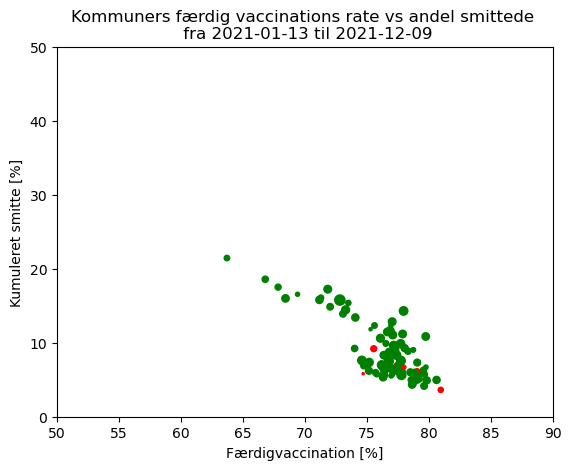

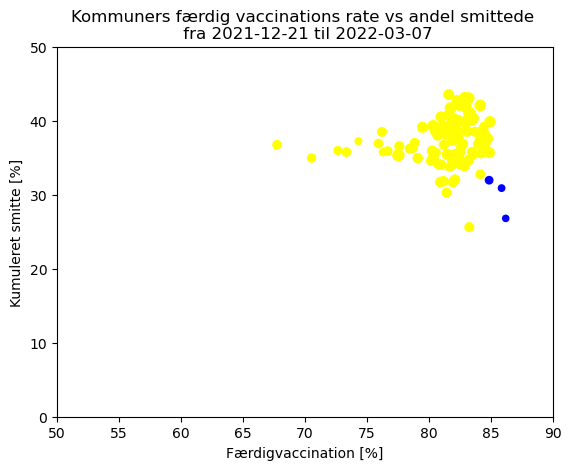

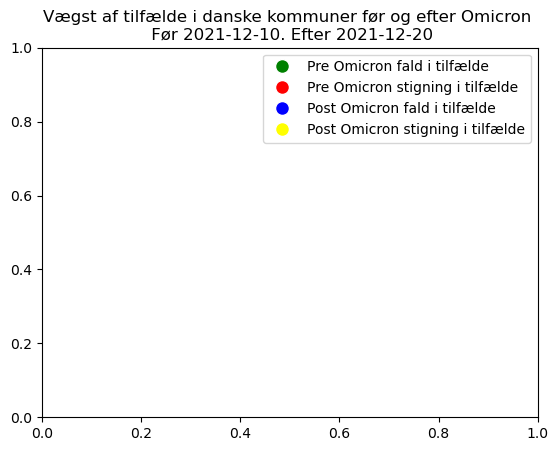

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure()
scatter_v_s(pre_dic,kommunenavn)
scatter_v_s(post_dic,kommunenavn,color_1="blue",color_2="yellow")
plt.title("Vægst af tilfælde i danske kommuner før og efter Omicron \n Før 2021-12-10. Efter 2021-12-20")

legend_elements = [ Line2D([0], [0], marker='o', color='w', label='Pre Omicron fald i tilfælde', markerfacecolor='green', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Pre Omicron stigning i tilfælde', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Post Omicron fald i tilfælde', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Post Omicron stigning i tilfælde', markerfacecolor='yellow', markersize=10),
                  ]

# fig, ax = plt.subplots()



plt.legend(handles=legend_elements)

plt.show()
plt.savefig(fig_path+"\Vaccinerate mod tilvælde for danske kommuner.png",bbox_inches ="tight",pad_inches = 1)

### Post omicron total afhænig commune breakdown

In [24]:
for i in kommunenavn:
    post_dic[i]["P(Smittet og Vaccineret)"]=(post_dic[i]["Kumuleret procent faerdigvacc."]/100*post_dic[i]["Kumuleret procent smittede"]/100)*100
    post_dic[i]["P(Smittede og ikke Vacinnerede)"]=((1-post_dic[i]["Kumuleret procent faerdigvacc."]/100)*post_dic[i]["Kumuleret procent smittede"]/100)*100
    post_dic[i]["P(Vaccinerede og ikke Smittede)"]=(post_dic[i]["Kumuleret procent faerdigvacc."]/100*(1-post_dic[i]["Kumuleret procent smittede"]/100))*100
    post_dic[i]["P(ikke Smittet og ikke Vaccineret)"]=((1-post_dic[i]["Kumuleret procent faerdigvacc."]/100)*(1-post_dic[i]["Kumuleret procent smittede"]/100))*100

post_latest_V = []
post_latest_I = []

post_latest_SV = np.array([]) #Seneste P(Smittet og Vaccineret)
post_latest_SIV = np.array([]) # Seneste P(Smittet og ikke Vaccineret)
post_latest_ISV = np.array([]) # Seneste P(Vaccineret og ikke Smittet)
post_latest_ISIV = np.array([]) # Seneste P(ikke Smittet og ikke Vaccineret)


for i in kommunenavn:
    post_latest_V.append(post_dic[i]["Kumuleret procent faerdigvacc."].iloc[-1])
    post_latest_I.append(post_dic[i]['Kumuleret procent smittede'].iloc[-1])

    #latest_SV.append(post_dic[i]["P(Smittet og Vaccineret)"].iloc[-1])
    post_latest_SV = np.append(post_latest_SV,post_dic[i]["P(Smittet og Vaccineret)"].iloc[-1])
    post_latest_SIV = np.append(post_latest_SIV,post_dic[i]["P(Smittede og ikke Vacinnerede)"].iloc[-1])
    post_latest_ISV = np.append(post_latest_ISV,post_dic[i]["P(Vaccinerede og ikke Smittede)"].iloc[-1])
    post_latest_ISIV = np.append(post_latest_ISIV,post_dic[i]["P(ikke Smittet og ikke Vaccineret)"].iloc[-1])
    

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_8188/3403882309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_dic[i]["P(Smittet og Vaccineret)"]=(post_dic[i]["Kumuleret procent faerdigvacc."]/100*post_dic[i]["Kumuleret procent smittede"]/100)*100
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_8188/3403882309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_dic[i]["P(Smittede og ikke Vacinnerede)"]=((1-post_dic[i]["Kumuleret procent faerdigvacc."]/100)*post_dic[i]["Kumuleret procent smitted

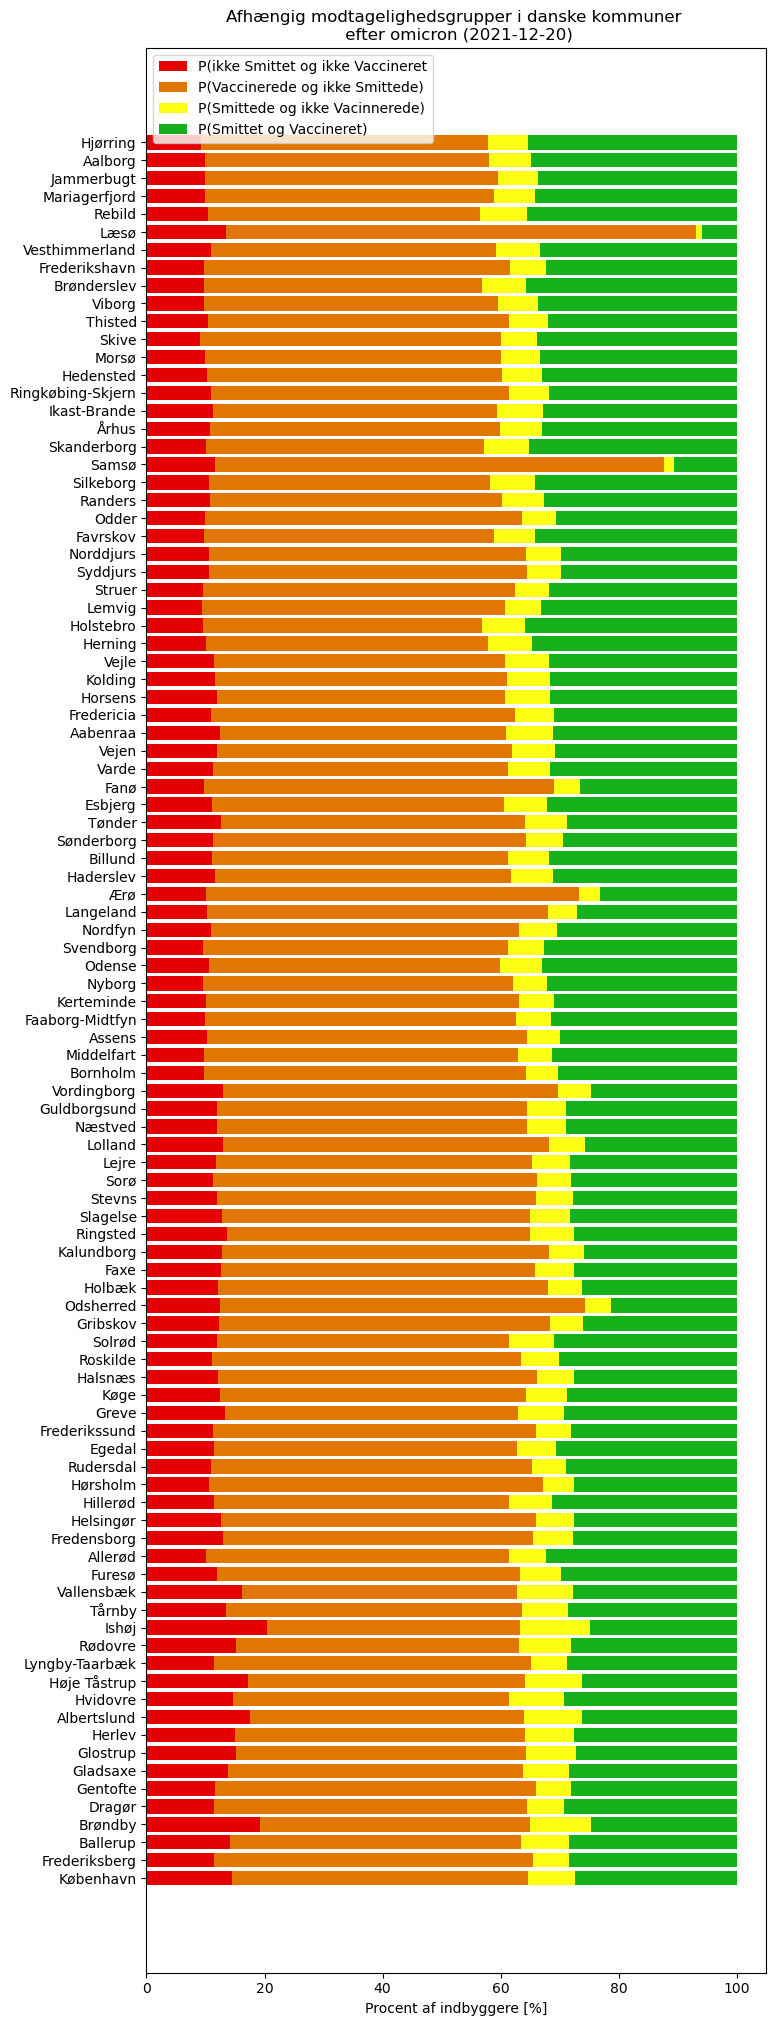

<Figure size 640x480 with 0 Axes>

In [25]:
#Figuren her er ikke korrekt da der nok er en højere sansynlighed for ikke vaccinerede bliver smittede end vaccinerede.
#Da omicron har et højt gennembruds tal kan det muligtvis bruges alligevel.
#Figuren giver et overblik over de mest sårbare (den røde mængde). I virkeligheden er den nok mindre en figuren giver udtryk for, da flere uvaccinerede bliver smittet en vaccinerede.

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 25))

#4 Grupper P(V)*P(S)= P(Smittet og Vaccineret), P(1-V)*P(S) = P(Smittede og ikke Vacinnerede),
# P(V)*P(1-S)=P(Vaccinerede og ikke Smittede)
# P(1-V)*P(1-S)=P(ikke Smittede og ikke Vaccinerede = Sårbare

ax.barh(kommunenavn,post_latest_ISIV, label="P(ikke Smittet og ikke Vaccineret", color="xkcd:red")
ax.barh(kommunenavn,post_latest_ISV, left=post_latest_ISIV, label="P(Vaccinerede og ikke Smittede)", color="xkcd:pumpkin")
ax.barh(kommunenavn,post_latest_SIV, left=post_latest_ISV+post_latest_ISIV, label="P(Smittede og ikke Vacinnerede)", color="xkcd:yellow") # left = latest_V,
ax.barh(kommunenavn,post_latest_SV, left=post_latest_SIV+post_latest_ISV+post_latest_ISIV, label="P(Smittet og Vaccineret)", color="xkcd:green")




ax.set_xlabel('Procent af indbyggere [%]')
ax.set_title('Afhængig modtagelighedsgrupper i danske kommuner \n efter omicron (2021-12-20)')

plt.legend()
fig_path = os.getcwd() +"\\..\\Figures"
plt.show()
plt.savefig(fig_path+"\Afhængig modtagelighed i danske kommuner efter omicron (2021-12-20).png",bbox_inches ="tight",pad_inches = 1)

In [26]:
#plt.close("all")